Pre Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as met
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

In [3]:
dataset=pd.read_csv("D:\\ML project\\dataset\\DOW30.csv")

In [4]:
dataset

,Date,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,2008/4/1,0,12266.63965,12659.82031,12266.46973,12654.36035,295530000.0,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,2008/4/2,1,12651.66992,12696.29004,12555.16992,12608.91992,232760000.0,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,2008/4/3,0,12605.83008,12675.12012,12527.75000,12626.03027,183870000.0,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,2008/4/4,1,12626.03027,12688.48047,12528.16016,12609.41992,181260000.0,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,2008/4/7,0,12612.58984,12733.66016,12583.28027,12612.42969,198070000.0,1.62,1.5713,22.42,914.70,108.91,1.28,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2018/3/23,1,23995.17969,24108.47070,23509.06055,23533.19922,482550000.0,0.54,1.2360,24.87,1342.35,65.80,0.58,1.68
2444,2018/3/26,0,23825.74023,24232.30078,23741.22070,24202.59961,479540000.0,0.52,1.2440,21.03,1348.40,65.49,0.53,1.68
2445,2018/3/27,0,24276.61914,24446.22070,23708.73047,23857.71094,524480000.0,0.52,1.2410,22.50,1350.65,65.21,0.56,1.68
2446,2018/3/28,1,23883.08008,24092.47070,23728.66992,23848.41992,530040000.0,0.49,1.2351,22.87,1341.05,64.30,0.61,1.68


In [5]:
dataset.head()

,Date,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,2008/4/1,0,12266.63965,12659.82031,12266.46973,12654.36035,295530000.0,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,2008/4/2,1,12651.66992,12696.29004,12555.16992,12608.91992,232760000.0,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,2008/4/3,0,12605.83008,12675.12012,12527.75000,12626.03027,183870000.0,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,2008/4/4,1,12626.03027,12688.48047,12528.16016,12609.41992,181260000.0,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,2008/4/7,0,12612.58984,12733.66016,12583.28027,12612.42969,198070000.0,1.62,1.5713,22.42,914.70,108.91,1.28,2.24


In [6]:
dataset.shape

(2448, 14)

In [7]:
dataset.info

<bound method DataFrame.info of            Date  LABEL         Open         High          Low        Close  \
0      2008/4/1      0  12266.63965  12659.82031  12266.46973  12654.36035   
1      2008/4/2      1  12651.66992  12696.29004  12555.16992  12608.91992   
2      2008/4/3      0  12605.83008  12675.12012  12527.75000  12626.03027   
3      2008/4/4      1  12626.03027  12688.48047  12528.16016  12609.41992   
4      2008/4/7      0  12612.58984  12733.66016  12583.28027  12612.42969   
...         ...    ...          ...          ...          ...          ...   
2443  2018/3/23      1  23995.17969  24108.47070  23509.06055  23533.19922   
2444  2018/3/26      0  23825.74023  24232.30078  23741.22070  24202.59961   
2445  2018/3/27      0  24276.61914  24446.22070  23708.73047  23857.71094   
2446  2018/3/28      1  23883.08008  24092.47070  23728.66992  23848.41992   
2447  2018/3/29      0  23949.17969  24314.30078  23928.13086  24103.10938   

           Volume  InterestRate

In [8]:
dataset.isnull().sum()

Date            0
LABEL           0
Open            0
High            0
Low             0
Close           0
Volume          0
InterestRate    0
ExchangeRate    0
VIX             0
Gold            0
Oil             0
TEDSpread       0
EFFR            0
dtype: int64

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = dataset.drop(['Date', 'LABEL'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=3)  
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
principal_df['LABEL'] = dataset['LABEL']
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
dataset = principal_df.copy()

Explained variance ratio: [0.48832725 0.21657794 0.12363819]


In [10]:
dataset.head()

,PC1,PC2,PC3,LABEL
0,-1.787848,3.260461,3.579342,0
1,-1.790535,2.876576,3.413113,1
2,-1.790182,2.729423,3.387321,0
3,-1.783104,2.772484,3.565833,1
4,-1.731762,2.670921,3.606717,0


In [11]:
dataset.corr()

,PC1,PC2,PC3,LABEL
PC1,1.000000e+00,1.166593e-15,4.503569e-17,0.004585
PC2,1.166593e-15,1.000000e+00,-2.777046e-16,-0.026534
PC3,4.503569e-17,-2.777046e-16,1.000000e+00,0.003043
LABEL,4.584514e-03,-2.653421e-02,3.043449e-03,1.000000


<Axes: >

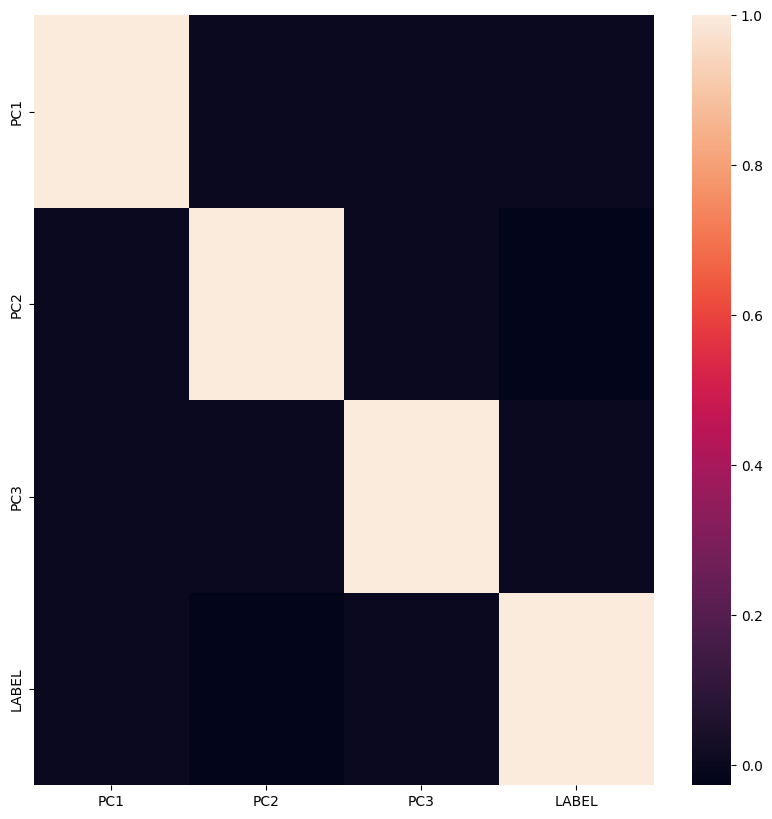

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

In [13]:
cate=[var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical data\n'.format(len(cate)))

There are 0 categorical data



In [14]:
numeri=[var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical data\n'.format(len(numeri)))

There are 4 numerical data



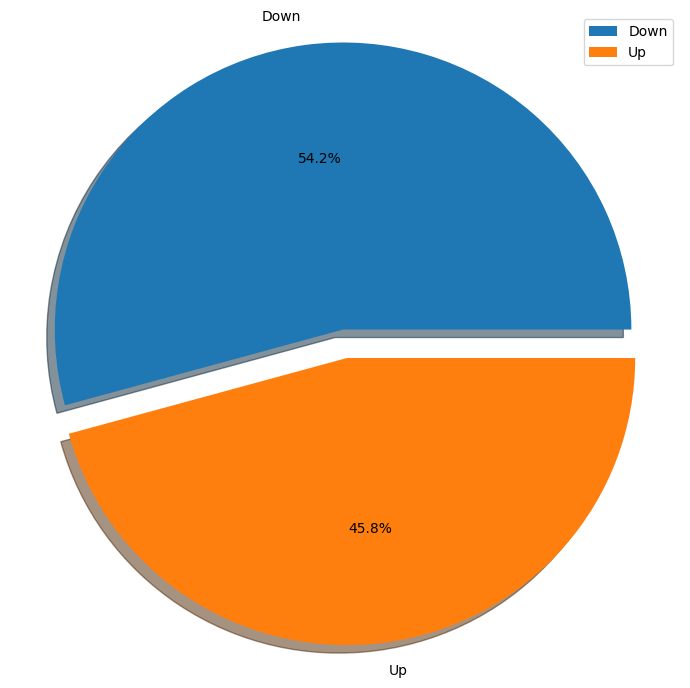

In [15]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(dataset['LABEL'].value_counts(), explode=explode,labels=['Down','Up'], autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

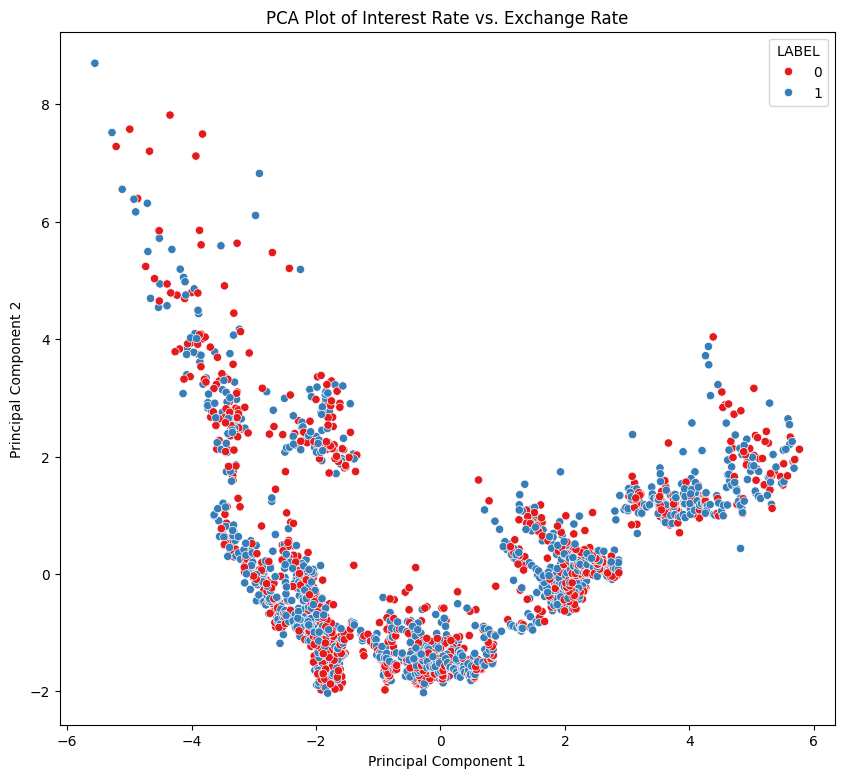

In [16]:
plt.figure(figsize=(10, 9))
sns.scatterplot(x='PC1', y='PC2', data=dataset, palette='Set1', hue='LABEL')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Interest Rate vs. Exchange Rate')
plt.legend(title='LABEL')
plt.show()

In [17]:
print(round(dataset[numeri].describe()),2)

          PC1     PC2     PC3   LABEL
count  2448.0  2448.0  2448.0  2448.0
mean      0.0     0.0     0.0     1.0
std       2.0     2.0     1.0     0.0
min      -6.0    -2.0    -3.0     0.0
25%      -2.0    -1.0    -1.0     0.0
50%      -0.0    -0.0     0.0     1.0
75%       2.0     1.0     1.0     1.0
max       6.0     9.0     4.0     1.0 2


Logistic Regression

In [18]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
dataset.shape
X_train.shape,X_test.shape

((1958, 3), (490, 3))

In [20]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
pred = lr.predict(X_train)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Train Result:
Accuracy Score: 55.72%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.61      0.05      0.10       884
           1       0.56      0.97      0.71      1074

    accuracy                           0.56      1958
   macro avg       0.58      0.51      0.40      1958
weighted avg       0.58      0.56      0.43      1958

_______________________________________________
Confusion Matrix: 
 [[  47  837]
 [  30 1044]]



In [22]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))

Training set score: 0.5572
Test set score: 0.5041


In [23]:
newdataset= pd.DataFrame({'Actual':y_train,'Predicted':pred})
newdataset

,Actual,Predicted
194,0,1
175,0,0
1924,0,1
461,1,1
1205,1,1
...,...,...
1033,0,1
1731,0,1
763,0,1
835,0,1


Text(0.5, 427.9555555555555, 'Predicted label')

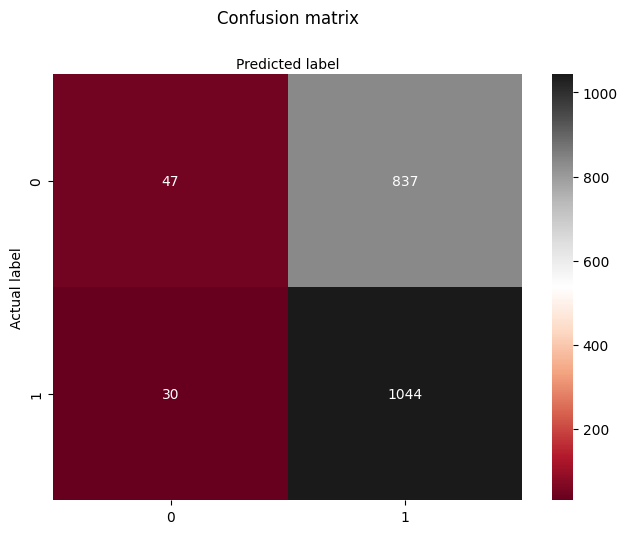

In [24]:
cm = confusion_matrix(y_train,pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision Tree

In [25]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [26]:
decisiontree=DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

In [27]:
decisiontreepredict=decisiontree.predict(X_test)
decisiontreepredict

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [28]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 49.59%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.47      0.44      0.46       236
           1       0.51      0.55      0.53       254

    accuracy                           0.50       490
   macro avg       0.49      0.49      0.49       490
weighted avg       0.49      0.50      0.49       490

_______________________________________________
Confusion Matrix: 
 [[104 132]
 [115 139]]



Naive Bayes

In [29]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
X_train.shape,X_test.shape
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)

GaussianNB()

In [30]:
y_predict=gaussNb.predict(X_test)

In [31]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predict)}\n")

Train Result:
Accuracy Score: 51.22%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.47      0.11      0.18       236
           1       0.52      0.88      0.65       254

    accuracy                           0.51       490
   macro avg       0.50      0.50      0.42       490
weighted avg       0.50      0.51      0.43       490

_______________________________________________
Confusion Matrix: 
 [[ 27 209]
 [ 30 224]]



KNN 

In [32]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [33]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)

In [34]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, KNN_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, KNN_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, KNN_predict)}\n")

Train Result:
Accuracy Score: 50.20%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.48      0.43      0.45       236
           1       0.52      0.57      0.54       254

    accuracy                           0.50       490
   macro avg       0.50      0.50      0.50       490
weighted avg       0.50      0.50      0.50       490

_______________________________________________
Confusion Matrix: 
 [[101 135]
 [109 145]]



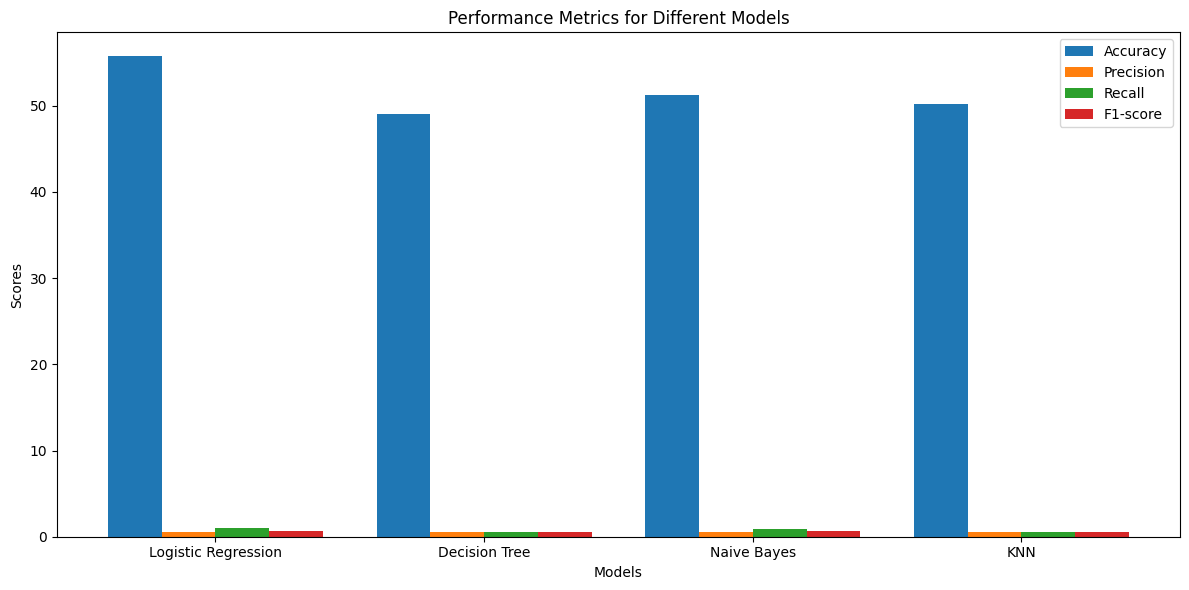

In [37]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'KNN']
accuracy = [55.72, 48.98, 51.22, 50.20]
precision = [0.58, 0.49, 0.50, 0.50]
recall = [0.97, 0.51, 0.88, 0.57]
f1_score = [0.71, 0.51, 0.65, 0.54]

bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision, bar_width, label='Precision')
plt.bar(index + 2*bar_width, recall, bar_width, label='Recall')
plt.bar(index + 3*bar_width, f1_score, bar_width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Different Models')
plt.xticks(index + 1.5*bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()
